Project - 4

# Adult income census

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

## Accessing the Dataset

In [42]:
cen= pd.read_csv('census_income.csv')
cen.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

In [43]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
cen.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [45]:
cen.shape

(32560, 15)

In [46]:
cen.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [47]:
cen.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [48]:
cen.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [49]:
cen['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [50]:
cen['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [51]:
cen['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [52]:
cen['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [53]:
cen['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [54]:
cen['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [55]:
cen['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [56]:
cen['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

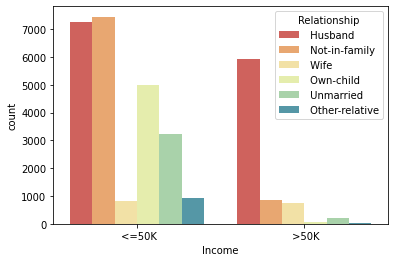

In [57]:
sns.countplot(cen['Income'],palette='Spectral',hue='Relationship',data=cen);

In [58]:
#Replacing '?' values 
cen['Workclass']=cen['Workclass'].str.replace('?','Private')
cen['Occupation']=cen['Occupation'].str.replace('?','Prof-specialty')
cen['Native_country']=cen['Native_country'].str.replace('?','United-States')

## Feature Engineering

In [59]:
#Education
cen.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',regex=True,inplace=True)
cen.Education.replace(['Assoc-voc','Some-college','Prof-school','Assoc-acdm'],'Higher',regex=True,inplace=True)
cen['Education']=cen['Education'].str.replace('HS-grad','High School')
cen['Education']=cen['Education'].str.replace('Bachelors','Undergrad')
cen['Education']=cen['Education'].str.replace('Masters','Grad')

In [60]:
#Marital status
cen.Marital_status.replace(['Married-spouse-absent','Divorced','Separated','Widowed'],'Other',regex=True,inplace=True)
cen.Marital_status.replace(['Married-civ-spouse','Married-AF-spouse'],'Married',regex=True,inplace=True)
cen['Marital_status']=cen['Marital_status'].str.replace('Never-married','Not married')

## Data Visualization

In [61]:
cen.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


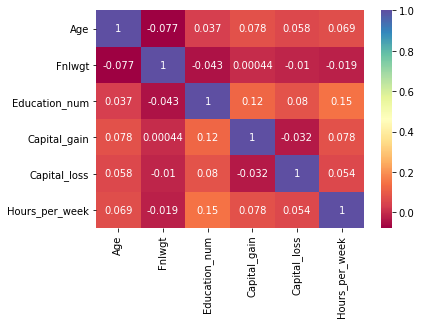

In [62]:
#Correlation heatmap
sns.heatmap(cen.corr(), cmap="Spectral", annot=True);

In [63]:
#sns.pairplot(cen)

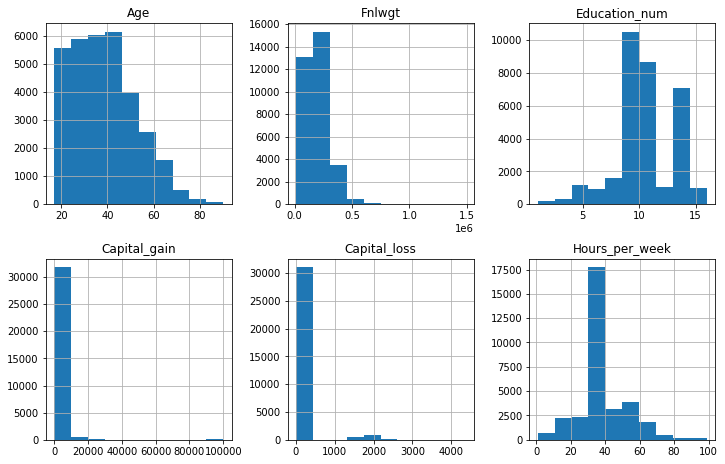

In [64]:
#Histogram
cen.hist(figsize=(12,12),layout=(3,3),sharex=False);

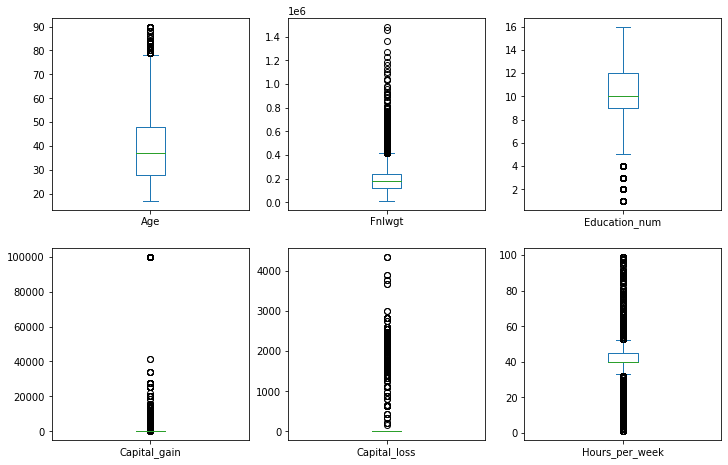

In [65]:
#Boxplot
cen.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

In [66]:
#Piechart
px.pie(cen,values='Education_num',names='Education',title='% of Education',color_discrete_sequence=px.colors.qualitative.T10)

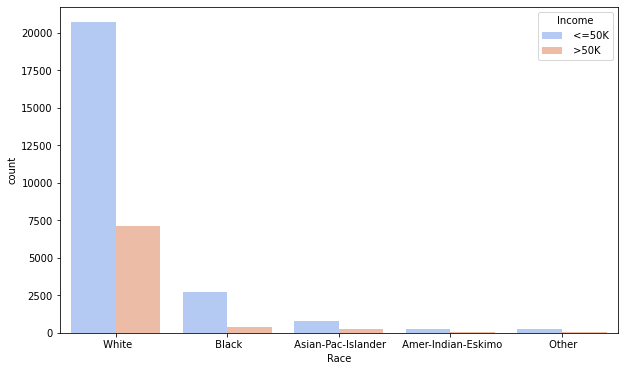

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(cen['Race'],palette='coolwarm',hue='Income',data=cen);

## Model Building

In [68]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler,LabelEncoder
df = cen.copy()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,5,12,0,3,0,4,1,0,0,12,38,0
1,21,3,14085,2,8,2,5,1,4,1,0,0,39,38,0
2,36,3,15335,4,6,0,5,0,2,1,0,0,39,38,0
3,11,3,19354,5,12,0,9,5,2,0,0,0,39,4,0
4,20,3,17699,1,13,0,3,5,4,0,0,0,39,38,0


In [69]:
ss = StandardScaler().fit(df.drop('Income',axis=1))

In [70]:
X = ss.transform(df.drop('Income',axis=1))
y=cen['Income']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

### Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc = lr.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc*100),"%")

Accuracy: 83.90  %


### Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model1 = rfc.fit(X_train,y_train) 
y_pred1 = model1.predict(X_test)

acc1 = rfc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc1*100),"%")

Accuracy: 86.05  %


### Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
model2 = gbc.fit(X_train,y_train) 
y_pred2 = model2.predict(X_test)

acc2 = gbc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc2*100),"%")

Accuracy: 86.79  %


[[7040  372]
 [ 918 1438]]


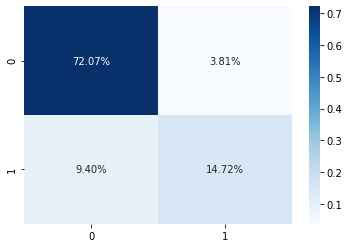

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm=confusion_matrix(y_test, y_pred2)
print(cm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues');

In [76]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      7412
        >50K       0.79      0.61      0.69      2356

    accuracy                           0.87      9768
   macro avg       0.84      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768



#### The test Accuracy obtained from the Gradient Booster Classifier is 86.79% which is the highest numeric accuracy achieved from this Income Prediction Model so far.